In [1]:
import numpy as np
import matplotlib.pyplot as plt
import impyute.imputation.ts as ts
import pandas as pd
import gzip
import pickle
from tqdm import tqdm_notebook

In [2]:
import data_create_tool as dct

In [3]:
with gzip.open("trainset/org_input_data.pickle",'rb') as f:
    data = pickle.load(f)

In [23]:
keys = data[111121].keys()

In [24]:
for area in data.keys():
    data[area] = data[area].to_numpy()

In [25]:
keys

Index(['RAIN', 'SO2', 'NOX', 'NO2', 'NO', 'O3', 'CO', 'PM10', 'PM25'], dtype='object')

In [39]:
val = data[111121]
val[np.isnan(val)] = -1

In [61]:
arr = np.array(val[0:24].T)
# arr = np.append(arr,arr,axis=0)
a = int(len(val)/24)
for col in range(1,a):
    # print(col)
    arr = np.append(arr,val[24*col:24*col + 24].T,axis=0)
arr.reshape(-1,9,24)

In [9]:
from pyts.datasets import load_basic_motions
from pyts.multivariate.image import JointRecurrencePlot

In [4]:
image_data = dct.joint_recurrence_plot(df = data,threshold_val='distance',percentage_val=10)

In [ ]:
image_data

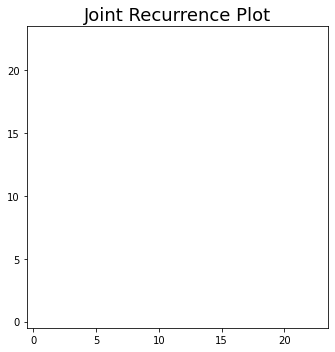

In [8]:

# X = val.reshape(-1,24,9)
# # Recurrence plot transformation
# jrp = JointRecurrencePlot(threshold='distance', percentage=10)
# X_jrp = jrp.fit_transform(X)
# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(image_data[111121][4], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()


In [10]:
len(image_data[111121])

640

In [15]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})
X[0]

array([[0.000, 0.003, 0.025, 0.023, 0.002, 0.016, 0.300, 36.000, 30.000],
       [0.000, 0.003, 0.020, 0.018, 0.002, 0.019, 0.300, 31.000, 34.000],
       [0.000, 0.003, 0.020, 0.018, 0.002, 0.020, 0.300, 31.000, 29.000],
       [0.000, 0.003, 0.036, 0.034, 0.002, 0.009, 0.400, 32.000, 30.000],
       [0.000, 0.002, 0.033, 0.031, 0.002, 0.010, 0.400, 33.000, 28.000],
       [0.000, 0.003, 0.031, 0.028, 0.003, 0.011, 0.300, 35.000, 34.000],
       [0.000, 0.003, 0.032, 0.026, 0.006, 0.009, 0.300, 36.000, 30.000],
       [0.000, 0.003, 0.023, 0.019, 0.003, 0.013, 0.300, 37.000, 37.000],
       [0.000, 0.003, 0.022, 0.017, 0.005, 0.016, 0.300, 34.000, 33.000],
       [0.000, 0.003, 0.029, 0.019, 0.010, 0.014, 0.300, 36.000, 38.000],
       [0.000, 0.004, 0.023, 0.016, 0.007, 0.018, 0.300, 38.000, 36.000],
       [0.000, 0.003, 0.012, 0.009, 0.003, 0.032, 0.200, 40.000, 37.000],
       [0.000, 0.003, 0.013, 0.011, 0.003, 0.029, 0.200, 14.000, 20.000],
       [0.000, 0.003, 0.012, 0.009, 0.

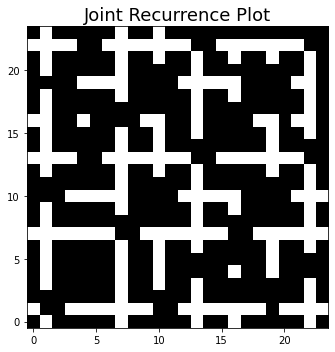

In [43]:
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[6], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()


In [44]:
X_jrp.shape

(640, 24, 24)

In [30]:
X.shape

(40, 6, 100)

In [ ]:
dct